# Introduction

This notebook contains the analysis of weekly snowall in montreal from 2016 to 2022. We will aggregate all the data regarding the snow recovered from the snow removal strategy while comparing the actual snowfall.

In [19]:
#!pip install ipython
#!conda install -c conda-forge tslearn -y
from IPython.display import display

In [182]:
import pandas as pd
from pandas.tseries.frequencies import to_offset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")

from pathlib import Path
import functions
import joblib

# Importing Snow recovery data

In [190]:
timestamp = 'DateDechargement'
df = []
for y in range(2016,2022):
    t = functions.generate_source_path(name='transaction',year=y, prepath='../').absolute()
    dt = pd.read_csv(t, index_col=0, parse_dates=[timestamp, 'DateChargement'], low_memory=False) 
    
    col = ['IdentifiantDepot','TypeDepot']
    d = functions.generate_source_path(name='depot',year=y, prepath='../').absolute()
    dd = pd.read_csv(d, index_col=0, usecols=col) 
    print(dt.shape)
    m = dt.merge(dd, on='IdentifiantDepot', how='inner')
    print(m.shape)
    df.append(m) 

(338809, 13)
(338809, 14)
(432015, 13)
(432015, 14)
(349543, 13)
(349541, 14)
(320395, 13)
(320275, 14)
(251395, 13)
(251334, 14)
(260680, 13)
(260569, 14)


In [191]:
ddf = pd.concat(df, axis=0)

In [192]:
print(ddf.shape)
ddf.tail(4)


(1952543, 16)


,DateChargement,Idenfiantsecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDechargement,volume,TypeTransaction,IdentifiantContrat,NuméroContrat,TypeDepot,IdenfiantSecteur,NumeroContrat
260565,2022-02-28 06:44:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-02-28 06:44:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104
260566,2022-10-14 09:05:40,NaN,VDM-01,28,VDM,Ville de Montréal,28,Sauvé (AHU),2022-10-14 09:05:40,0.00,N-AUT,1088.0,NaN,Chute_Egout,71.0,VDM
260567,2022-03-01 07:56:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-03-01 07:56:00,28.09,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104
260568,2022-01-19 16:20:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-01-19 16:20:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104


In [193]:
#df_time = functions.datetime_attributes(ddf,column=timestamp)
df_iso = functions.datetime_isocalendar(ddf,column=timestamp)
dfk = pd.concat([ddf, df_iso[['year','week']]],axis=1)
print(dfk.shape)
display(dfk.head(4))
display(dfk.tail(4))

(1952543, 18)


,DateChargement,Idenfiantsecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDechargement,volume,TypeTransaction,IdentifiantContrat,NuméroContrat,TypeDepot,IdenfiantSecteur,NumeroContrat,year,week
0,2016-12-13 10:45:02,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 10:53:27,59.64,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50
1,2016-12-13 11:11:01,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:19:52,59.64,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50
2,2016-12-13 11:35:02,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:46:32,59.64,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50
3,2016-12-13 10:57:00,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:04:27,31.14,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50


,DateChargement,Idenfiantsecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDechargement,volume,TypeTransaction,IdentifiantContrat,NuméroContrat,TypeDepot,IdenfiantSecteur,NumeroContrat,year,week
260565,2022-02-28 06:44:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-02-28 06:44:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104,2022,9
260566,2022-10-14 09:05:40,NaN,VDM-01,28,VDM,Ville de Montréal,28,Sauvé (AHU),2022-10-14 09:05:40,0.00,N-AUT,1088.0,NaN,Chute_Egout,71.0,VDM,2022,41
260567,2022-03-01 07:56:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-03-01 07:56:00,28.09,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104,2022,9
260568,2022-01-19 16:20:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-01-19 16:20:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104,2022,3


In [194]:
when = ['year','week']
who = 'ArrondissementCode'
what = 'volume'
how = 'TypeDepot'

In [195]:
when_who_how = yw +[who] + [how]
print(when_who_how)

['year', 'week', 'ArrondissementCode', 'TypeDepot']


In [196]:
# 11-01 to 04-30  ->  w44 to  w52 | w1 to w18   -> drop w 19 to w 43
sel = dfk[~dfk['week'].between(19,43)]
print(sel['year'].unique())
sel = sel[sel['volume']>=0.01] # remove or not ( suppress the 2006 errors)
print(sel['year'].unique())

[2016 2017 2018 2019 2020 2021 2022 2006]
[2016 2017 2018 2019 2020 2021 2022]


In [197]:
print(sel.shape)

(1951968, 18)


In [198]:
sg = sel.groupby(by=when_who_how).agg({what:'sum'})
display(sg)

volume
year week ArrondissementCode TypeDepot            
2016 48   SLA                Entassement     25.00
     49   AHU                Chute_Egout     55.00
          S-O                Chute_Egout    110.00
          SLA                Chute_Egout     55.00
                             Entassement    110.00
...                                            ...
2022 12   SLA                Entassement     30.50
          VMA                Carierre      1000.00
          VSP                Carierre     10760.00
     13   PMR                Chute_Egout     43.71
                             Entassement     32.69

[2218 rows x 1 columns]

In [199]:
dfs = sg.reset_index()
dfs['yw'] = 100*dfs['year'] + dfs['week']
display(dfs)

,year,week,ArrondissementCode,TypeDepot,volume,yw
0,2016,48,SLA,Entassement,25.00,201648
1,2016,49,AHU,Chute_Egout,55.00,201649
2,2016,49,S-O,Chute_Egout,110.00,201649
3,2016,49,SLA,Chute_Egout,55.00,201649
4,2016,49,SLA,Entassement,110.00,201649
...,...,...,...,...,...,...
2213,2022,12,SLA,Entassement,30.50,202212
2214,2022,12,VMA,Carierre,1000.00,202212
2215,2022,12,VSP,Carierre,10760.00,202212
2216,2022,13,PMR,Chute_Egout,43.71,202213


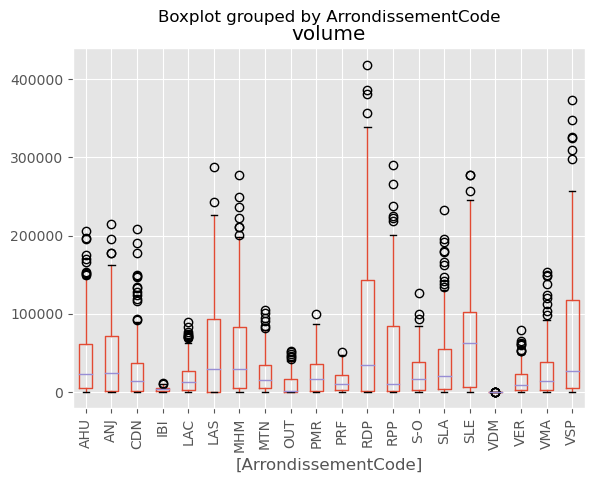

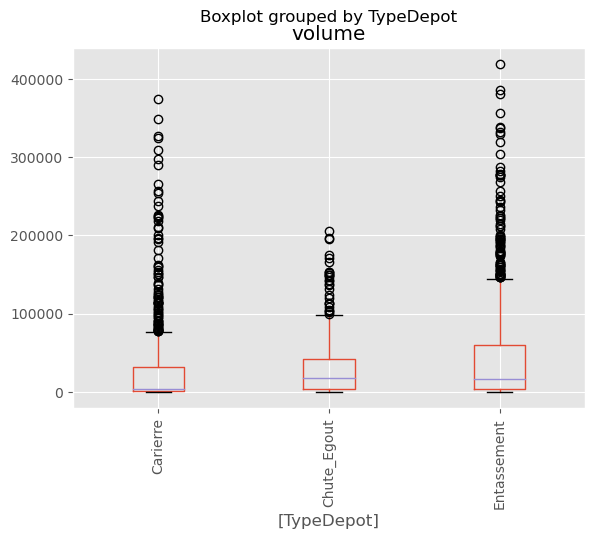

In [200]:
boxplot = dfs[['TypeDepot', 'ArrondissementCode', 'volume']].boxplot(by=['ArrondissementCode'], rot=90)

boxplot = dfs[['TypeDepot', 'ArrondissementCode', 'volume']].boxplot(by=['TypeDepot'], rot=90)


In [201]:
table_strategy_by_time = pd.pivot_table(dfs, values=what, index='yw',
                       columns=how, aggfunc=np.sum, fill_value=0)
table_strategy_by_time

TypeDepot,Carierre,Chute_Egout,Entassement
yw,,,
201648,0.00,0.00,25.00
201649,0.00,220.00,110.00
201650,246099.56,263787.07,567067.38
201651,14205.71,4681.87,6456.05
201652,134595.56,99887.06,291344.58
...,...,...,...
202209,365781.42,253933.46,981124.16
202210,45023.90,3142.35,9268.90
202211,27045.80,2356.83,4454.00


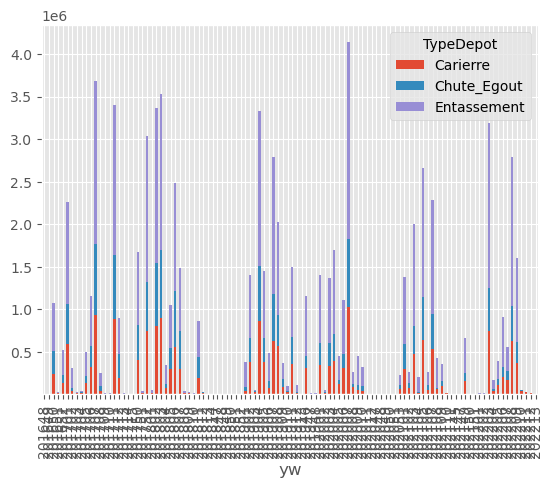

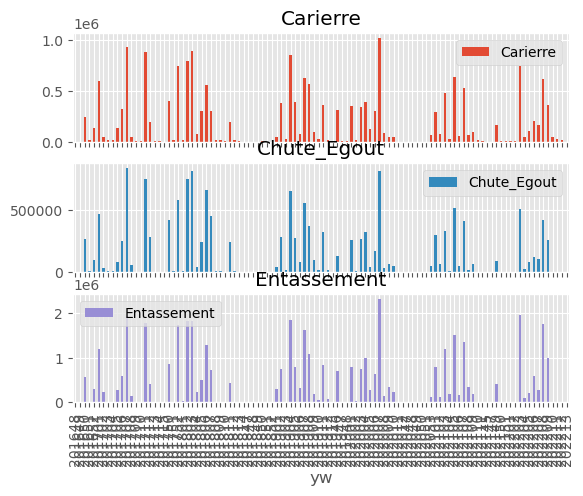

In [202]:
table_strategy_by_time.plot.bar(stacked=True)


axes = table_strategy_by_time.plot.bar(rot=90, subplots=True,)
axes[-1].legend(loc=2)  

In [203]:
table_strategy_by_arrondissement = pd.pivot_table(dfs, values=what, index=who,
                       columns=how, aggfunc=np.sum, fill_value=0)
display(table_strategy_by_arrondissement)

TypeDepot,Carierre,Chute_Egout,Entassement
ArrondissementCode,,,
AHU,2596238.57,4187673.98,696351.82
ANJ,467.39,0.00,4137885.07
CDN,745528.96,395836.28,3408333.31
IBI,0.00,0.00,234860.94
LAC,0.00,1034225.80,1475551.95
LAS,99.45,1396.87,4810711.89
MHM,27212.75,1983481.28,4945195.65
MTN,1707841.28,479065.05,1805789.39
OUT,616596.08,0.00,432500.38


,year,TypeDepot,volume
0,2016,Carierre,394900.83
1,2016,Chute_Egout,368576.00
2,2016,Entassement,865003.01
3,2017,Carierre,4369870.22
4,2017,Chute_Egout,3758712.66
5,2017,Entassement,9193198.54
6,2018,Carierre,3207664.93
7,2018,Chute_Egout,3207057.96
8,2018,Entassement,6904857.47
9,2019,Carierre,3783749.09


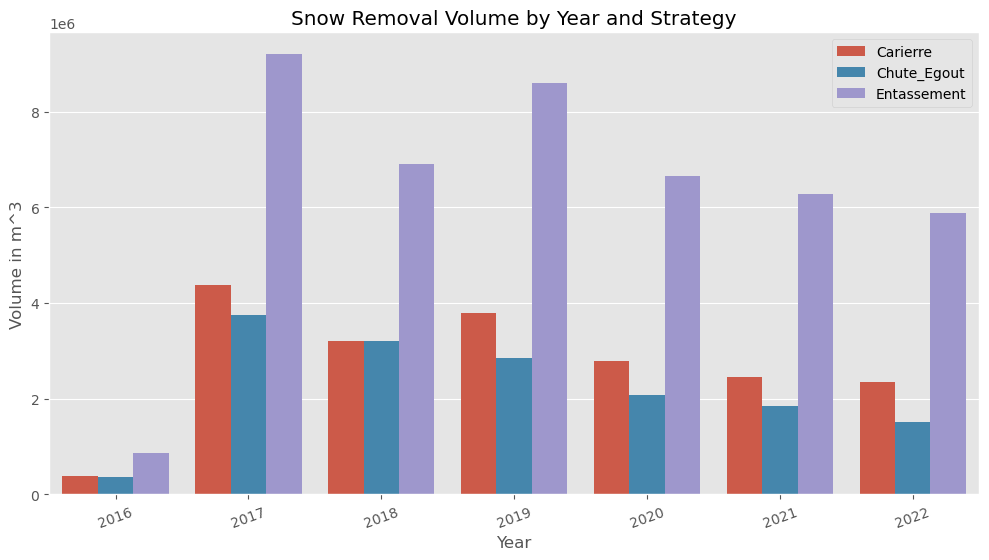

In [204]:
transactions_strategy_sum =  dfs.groupby(by=["year", "TypeDepot"])["volume"].sum()
transactions_strategy_sum = transactions_strategy_sum.reset_index()
display(transactions_strategy_sum)

plt.figure(figsize=(12, 6))
sns.barplot(x="year", y="volume", hue="TypeDepot", data=transactions_strategy_sum)
plt.legend(loc="best")
plt.xticks(rotation=20)
#plt.yscale("log")
plt.title("Snow Removal Volume by Year and Strategy")
plt.xlabel("Year")
plt.ylabel("Volume in m^3")
plt.show()

# JOINING WEATHER

In [205]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [206]:
# Set time period
start = datetime(2016, 11, 1)
end = datetime(2023, 5, 1)


In [207]:
# MONTREAL
MONTREAL_WMO_ID = 71627
data = Daily(MONTREAL_WMO_ID, start, end)
data = data.fetch()


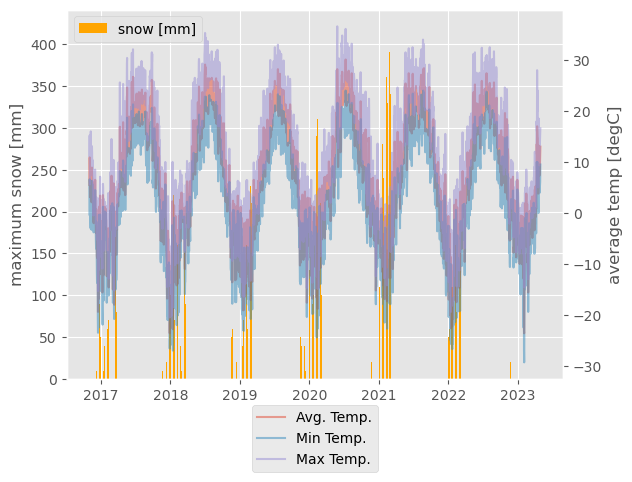

In [208]:
x = data.index
average_temp = data[['tavg', 'tmin', 'tmax']]

# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.bar(x, data['snow'], width=0.5, color='orange')
ax1.set_ylabel('maximum snow [mm]')

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.plot(x, average_temp, alpha=0.5) 
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('average temp [degC]')
#ax1.set_ylim(0, 35)
ax2.legend(['Avg. Temp.', 'Min Temp.', 'Max Temp.'],
            #loc="upper left"
            bbox_to_anchor =(0.5,-0.27), loc='lower center'
            )
#ax2.set_ylim(0, 1000)
ax1.legend(['snow [mm]'], loc="best")
plt.show()

In [209]:
weather = data.add_prefix('w_')
weather['date'] = weather.index
df_iso = functions.datetime_isocalendar(weather,column='date')
dweather = pd.concat([weather, df_iso[['year','week']]],axis=1)
display(dweather.head())
dweather = dweather.groupby(by=when).agg({'w_snow':'sum','w_tavg':'mean',
                                          'w_tmin':'min','w_tmax':'max',
                                          'w_wspd':'mean','w_prcp':'sum'}).reset_index()
display(dweather)

,w_tavg,w_tmin,w_tmax,w_prcp,w_snow,w_wdir,w_wspd,w_wpgt,w_pres,w_tsun,date,year,week
time,,,,,,,,,,,,,
2016-11-01,5.5,-0.3,11.2,0.4,NaN,127.0,13.6,NaN,1023.0,NaN,2016-11-01,2016,44
2016-11-02,10.9,6.6,15.2,0.0,NaN,NaN,8.5,NaN,1020.0,NaN,2016-11-02,2016,44
2016-11-03,8.2,5.6,10.7,10.0,NaN,9.0,11.6,NaN,1015.5,NaN,2016-11-03,2016,44
2016-11-04,3.1,0.5,5.6,0.4,NaN,288.0,14.8,NaN,1021.4,NaN,2016-11-04,2016,44
2016-11-05,5.4,2.2,8.6,1.2,NaN,NaN,8.8,NaN,1018.9,NaN,2016-11-05,2016,44


,year,week,w_snow,w_tavg,w_tmin,w_tmax,w_wspd,w_prcp
0,2016,44,0.0,6.150000,-1.6,15.2,11.583333,12.4
1,2016,45,0.0,5.457143,-3.3,16.0,19.357143,2.0
2,2016,46,10.0,5.928571,-1.1,13.1,14.966667,18.6
3,2016,47,160.0,-0.314286,-3.8,2.5,16.033333,9.2
4,2016,48,0.0,1.985714,-3.9,8.5,18.657143,36.0
...,...,...,...,...,...,...,...,...
334,2023,13,0.0,0.885714,-8.0,12.0,17.757143,18.2
335,2023,14,0.0,2.542857,-4.0,10.0,18.971429,33.0
336,2023,15,0.0,13.785714,1.0,28.0,20.457143,0.1
337,2023,16,0.0,8.428571,0.0,18.5,20.271429,13.3


In [210]:
dfs2 = dfs.merge(dweather, on=['year','week'], how='left') 
print(dfs.shape, dfs2.shape)
display(dfs2)

(2218, 6) (2218, 12)


,year,week,ArrondissementCode,TypeDepot,volume,yw,w_snow,w_tavg,w_tmin,w_tmax,w_wspd,w_prcp
0,2016,48,SLA,Entassement,25.00,201648,0.0,1.985714,-3.9,8.5,18.657143,36.0
1,2016,49,AHU,Chute_Egout,55.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
2,2016,49,S-O,Chute_Egout,110.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
3,2016,49,SLA,Chute_Egout,55.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
4,2016,49,SLA,Entassement,110.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2213,2022,12,SLA,Entassement,30.50,202212,0.0,1.957143,-9.5,9.0,19.257143,34.2
2214,2022,12,VMA,Carierre,1000.00,202212,0.0,1.957143,-9.5,9.0,19.257143,34.2
2215,2022,12,VSP,Carierre,10760.00,202212,0.0,1.957143,-9.5,9.0,19.257143,34.2
2216,2022,13,PMR,Chute_Egout,43.71,202213,0.0,-0.385714,-12.2,10.1,18.828571,4.2


# Adjusting to DWT

# Introduction

One of the questions we make to the dataset is the likelihood between neighborhoods and other aglomerative features. We will take the snow volume picked in each travel and agglomerate first by neighborhood.

We will treat each set of volume picked up as a time series. Later, we will compare each time series by applying a clustering algorithm with Dynamic Time Warping (DTW) to accomodate time series with different sizes.

In [186]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

ModuleNotFoundError: No module named 'tslearn'

In [ ]:
kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", n_jobs=-1, max_iter=100)
# filtered_volume_series_list = [x.tolist() for x in list(filtered_volume_series.values)]

X_bis = to_time_series_dataset(volume_series)
X_bis = TimeSeriesScalerMeanVariance().fit_transform(X_bis)
X_bis = TimeSeriesResampler(sz=1024).fit_transform(X_bis)
# X_bis.shape
kmeans.fit(X_bis)

In [185]:
joblib.dump(dfs2,Path('..','data','generated','descriptive_data.joblib'))

['../data/generated/descriptive_data.joblib']

In [ ]:
transaction_2016 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2016-2017.csv", index_col=0)
# transaction_2017 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2017-2018.csv", index_col=0)
transaction_2018 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2018-2019.csv", index_col=0)
transaction_2019 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2019-2020.csv", index_col=0)
transaction_2020 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2020-2021.csv", index_col=0)
transaction_2021 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2021-2022.csv", index_col=0)
transaction_2022 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2022-2023.csv", index_col=0)

# Preprocessing datasets

## Transaction 2016

In [ ]:
transaction_2016.info()

In [ ]:
transaction_2016.head()

In [ ]:
transaction_2016["NomSecteur"] = transaction_2016["NomSecteur"].fillna("NaN")
transaction_2016["NuméroContrat"] = transaction_2016["NuméroContrat"].fillna("NaN")
transaction_2016["IdentifiantContrat"] = transaction_2016["IdentifiantContrat"].fillna(np.nan)
transaction_2016["DateChargement"] = pd.to_datetime(transaction_2016["DateChargement"])
transaction_2016["DateDéchargement"] = pd.to_datetime(transaction_2016["DateDéchargement"])
transaction_2016.sort_values(by="DateDéchargement", inplace=True)


## Transactions 2018

In [ ]:
transaction_2018["NomSecteur"] = transaction_2018["NomSecteur"].fillna("NaN")
transaction_2018["NumeroContrat"] = transaction_2018["NumeroContrat"].fillna("NaN")
transaction_2018["IdentifiantContrat"] = transaction_2018["IdentifiantContrat"].fillna(np.nan)
transaction_2018["DateChargement"] = pd.to_datetime(transaction_2018["DateChargement"])
transaction_2018["DateDechargement"] = pd.to_datetime(transaction_2018["DateDechargement"])
transaction_2018.sort_values(by="DateDechargement", inplace=True)


In [ ]:
transaction_2018.info()

## Transactions 2019

In [ ]:
transaction_2019.info()

In [ ]:
transaction_2019["NomSecteur"] = transaction_2019["NomSecteur"].fillna("NaN")
transaction_2019["NumeroContrat"] = transaction_2019["NumeroContrat"].fillna("NaN")
transaction_2019["IdentifiantContrat"] = transaction_2019["IdentifiantContrat"].fillna(np.nan)
transaction_2019["DateChargement"] = pd.to_datetime(transaction_2019["DateChargement"])
transaction_2019["DateDechargement"] = pd.to_datetime(transaction_2019["DateDechargement"])
transaction_2019.sort_values(by="DateDechargement", inplace=True)


## Transaction 2020

In [ ]:
transaction_2020.info()

In [ ]:
transaction_2020["NomSecteur"] = transaction_2020["NomSecteur"].fillna("NaN")
transaction_2020["NumeroContrat"] = transaction_2020["NumeroContrat"].fillna("NaN")
transaction_2020["IdentifiantContrat"] = transaction_2020["IdentifiantContrat"].fillna(np.nan)
transaction_2020["DateChargement"] = pd.to_datetime(transaction_2020["DateChargement"])
transaction_2020["DateDechargement"] = pd.to_datetime(transaction_2020["DateDechargement"])
transaction_2020.sort_values(by="DateDechargement", inplace=True)


## Transactions 2021

In [ ]:
transaction_2021.info()

In [ ]:
transaction_2021["NomSecteur"] = transaction_2021["NomSecteur"].fillna("NaN")
transaction_2021["NumeroContrat"] = transaction_2021["NumeroContrat"].fillna("NaN")
transaction_2021["IdentifiantContrat"] = transaction_2021["IdentifiantContrat"].fillna(np.nan)
transaction_2021["DateChargement"] = pd.to_datetime(transaction_2021["DateChargement"])
transaction_2021["DateDechargement"] = pd.to_datetime(transaction_2021["DateDechargement"])
transaction_2021.sort_values(by="DateDechargement", inplace=True)


## Transactions 2022

In [ ]:
transaction_2022.info()

In [ ]:
transaction_2022["NomSecteur"] = transaction_2022["NomSecteur"].fillna("NaN")
transaction_2022["NumeroContrat"] = transaction_2022["NumeroContrat"].fillna("NaN")
transaction_2022["IdentifiantContrat"] = transaction_2022["IdentifiantContrat"].fillna(np.nan)
transaction_2022["DateChargement"] = pd.to_datetime(transaction_2022["DateChargement"])
transaction_2022["DateDechargement"] = pd.to_datetime(transaction_2022["DateDechargement"])
transaction_2022.sort_values(by="DateDechargement", inplace=True)

# Resampling Volumes by Week

In [ ]:
def year_month_date_to_string(date):
    return date.strftime('%Y%m')

def resample(df, index):
    d = df.set_index(index)
    return d.resample('1T', kind='timestamp').bfill()

def datetime_attributes(df, column, attribute=['year', 'month', 'day', 'hour', 'dayofyear', 'quarter']):
    # define generator expression of series, one for each attribute
    date_gen = (getattr(df[column].dt, i).rename(i) for i in attribute)
    return pd.concat(date_gen, axis=1)

def datetime_isocalendar(df, column, attribute=['year','week', 'weekday']):
    date_gen =  df.apply(lambda x: x[column].isocalendar(), axis=1, result_type='expand')
    return date_gen.rename(columns= dict((i,j) for i,j in enumerate(attribute)) )


transaction_2016_weeks = pd.merge(transaction_2016, datetime_isocalendar(transaction_2016, "DateDéchargement"), on="TransactionID")
# transaction_2017_weeks = pd.merge(transaction_2017, datetime_isocalendar(transaction_2017, "DateDechargement"), on="TransactionID")
transaction_2018_weeks = pd.merge(transaction_2018, datetime_isocalendar(transaction_2018, "DateDechargement"), on="TransactionID")
transaction_2019_weeks = pd.merge(transaction_2019, datetime_isocalendar(transaction_2019, "DateDechargement"), on="TransactionID")
transaction_2020_weeks = pd.merge(transaction_2020, datetime_isocalendar(transaction_2020, "DateDechargement"), on="TransactionID")
transaction_2021_weeks = pd.merge(transaction_2021, datetime_isocalendar(transaction_2021, "DateDechargement"), on="TransactionID")
transaction_2022_weeks = pd.merge(transaction_2022, datetime_isocalendar(transaction_2022, "DateDechargement"), on="TransactionID")



In [ ]:
transaction_2022_weeks

In [ ]:
def adjust_week_number(dataframe, year_1, year_2):
    if year_1 == 2016:
        date_column_name = "DateDéchargement"
    else:
        date_column_name = "DateDechargement"
    dataframe = dataframe[(dataframe[date_column_name] >= f"{year_1}-11-01") & (dataframe[date_column_name] <= f"{year_2}-04-30")]
    first_year_earliest_week = dataframe[dataframe["year"] == year_1]["week"].min()
    first_year_last_week = dataframe[dataframe["year"] == year_1]["week"].max()
    # dataframe["weeks_adjusted"] = adjust_week(dataframe, year_1, year_2, first_year_earliest_week)
    dataframe["weeks_adjusted"] = adjust_week(dataframe, year_1, year_2, first_year_earliest_week, first_year_last_week)
    return dataframe

def adjust_week(dataframe, year_1, year_2, first_year_earliest_week, first_year_last_week):
    series = []
    min_week_year1 = first_year_earliest_week
    for i, row in dataframe.iterrows():
        if row["year"] == year_1:
            series.append(row["week"] - 44)
        else:
            series.append(row["week"] + 8)

    return series
transaction_2016_weeks = adjust_week_number(transaction_2016_weeks, 2016, 2017)
# transaction_2017_weeks = adjust_week_number(transaction_2017_weeks, 2017, 2018)
transaction_2018_weeks = adjust_week_number(transaction_2018_weeks, 2018, 2019)
transaction_2019_weeks = adjust_week_number(transaction_2019_weeks, 2019, 2020)
transaction_2020_weeks = adjust_week_number(transaction_2020_weeks, 2020, 2021)
transaction_2021_weeks = adjust_week_number(transaction_2021_weeks, 2021, 2022)
transaction_2022_weeks = adjust_week_number(transaction_2022_weeks, 2022, 2023)

In [ ]:
transaction_2019_weeks["weeks_adjusted"]

In [ ]:
transaction_2016_weeks = transaction_2016_weeks.groupby(by="weeks_adjusted")["volume"].sum()
# transaction_2017_weeks = transaction_2017_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2018_weeks = transaction_2018_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2019_weeks = transaction_2019_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2020_weeks = transaction_2020_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2021_weeks = transaction_2021_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2022_weeks = transaction_2022_weeks.groupby(by="weeks_adjusted")["volume"].sum()

In [ ]:
transaction_2018_weeks

# Generating Lineplots for snow

In [ ]:
transaction_2021_weekly

In [ ]:
snowfall_years = [
    transaction_2016_weeks, transaction_2018_weeks,
    transaction_2019_weeks, transaction_2020_weeks,
    transaction_2021_weeks, transaction_2022_weeks,
]
complete_average_snowfall = pd.concat(snowfall_years, axis=1, join="outer").mean(axis=1)
order = [
    '11-08',
    '11-15',
    '11-22',
    '11-29',
    '12-06',
    '12-13',
    '12-20',
    '12-27',
    '01-03',
    '01-10',
    '01-17',
    '01-24',
    '01-31',
    '02-07',
    '02-14',
    '02-21',
    '02-28',
    '03-06',
    '03-07',
    '03-13',
    '03-14',
    '03-20',
    '03-21',
    '03-28',
    '04-04',
    '04-11',
]
# complete_average_snowfall = complete_average_snowfall.loc[order]
complete_average_snowfall = complete_average_snowfall.sort_index()
complete_average_snowfall

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=transaction_2016_weeks.index, y=transaction_2016_weeks.values, label="2016")
sns.lineplot(x=transaction_2018_weeks.index, y=transaction_2018_weeks.values, label="2018")
sns.lineplot(x=transaction_2019_weeks.index, y=transaction_2019_weeks.values, label="2019")
sns.lineplot(x=transaction_2020_weeks.index, y=transaction_2020_weeks.values, label="2020")
sns.lineplot(x=transaction_2021_weeks.index, y=transaction_2021_weeks.values, label="2021")
sns.lineplot(x=transaction_2022_weeks.index, y=transaction_2022_weeks.values, label="2022")
# plt.yscale("log")
plt.xticks(rotation=20)
plt.show()

In [ ]:
transaction_2019_weekly.reset_index()

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=transaction_2016_weeks.index, y=transaction_2016_weeks.values, label="2016")
sns.scatterplot(x=transaction_2018_weeks.index, y=transaction_2018_weeks.values, label="2018")
sns.scatterplot(x=transaction_2019_weeks.index, y=transaction_2019_weeks.values, label="2019")
sns.scatterplot(x=transaction_2020_weeks.index, y=transaction_2020_weeks.values, label="2020")
sns.scatterplot(x=transaction_2021_weeks.index, y=transaction_2021_weeks.values, label="2021")
sns.scatterplot(x=transaction_2022_weeks.index, y=transaction_2022_weeks.values, label="2022")
plt.yscale("log")
plt.xticks(rotation=25)
plt.show()

In [ ]:
# plt.figure(figsize=(12, 6))
# transaction_2016_weekly["year"] = 2016
# transaction_2018_weekly["year"] = 2018
# transaction_2019_weekly["year"] = 2019
# transaction_2020_weekly["year"] = 2020
# transaction_2021_weekly["year"] = 2021
# transaction_2022_weekly["year"] = 2022
# concatenated_snow_removal = pd.concat([
#     transaction_2016_weekly, transaction_2018_weekly,
#     transaction_2019_weekly, transaction_2020_weekly,
#     transaction_2022_weekly, transaction_2016_weekly], axis=0)
# sns.barplot(x=concatenated_snow_removal.reset_index().index, y=transaction_2016_weekly, label="2016")

# plt.xticks(rotation=25)
# plt.show()

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=complete_average_snowfall.index, y=complete_average_snowfall.values)
plt.title("Average snowfall removal per week from 2016 to 2022")
plt.xlabel("Operation Weeks")
plt.ylabel("Average Volume in m3 log-scale")
# plt.xticks(rotation=20)
plt.yscale("log")
plt.show()

how to calculate the snow data? we have data in mm

In [ ]:
complete_average_snowfall